# Explore here

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
import pandas as pd
import seaborn as sns
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
from dotenv import load_dotenv
# load the .env file variables
load_dotenv()
client_id = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")
#print(client_id)
cod_art = 'spotify:artist:790FomKkXshlbRYZFtlgla'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id = client_id,client_secret =client_secret))

top10=spotify.artist_top_tracks(cod_art)
 

In [2]:
cancion=[]
popularidad=[]
duracion=[]
for track in top10['tracks'][:10]:
    for i,val in enumerate(top10['tracks'][0]):
        if i==3:
            duracion.append(track['duration_ms'])
        if i==11:
            cancion.append(track['name'])
        if i==12:
            popularidad.append(track['popularity'])    
data={'Titulo_Cancion':cancion,'Popularidad':popularidad,'Duracion (Min)':duracion}
df_top10=pd.DataFrame(data)
df_top10['Duracion (Min)']=df_top10['Duracion (Min)'].multiply(0.00001666667) 
df_top10=df_top10.sort_values(by=['Popularidad']) 
df_top10.reset_index(inplace=True)
df_top10=df_top10.drop(['index'],axis=1)
df_top10.tail(3)

,Titulo_Cancion,Popularidad,Duracion (Min)
7,CONTIGO (with Tiësto),86,3.213101
8,QLONA,88,2.879951
9,AMARGURA,88,2.841334


#### Claramente se observa que la duracion del track no tiene nada que ver con la popularidad del mismo, la correlacion entre ambas variables es muy pobre.

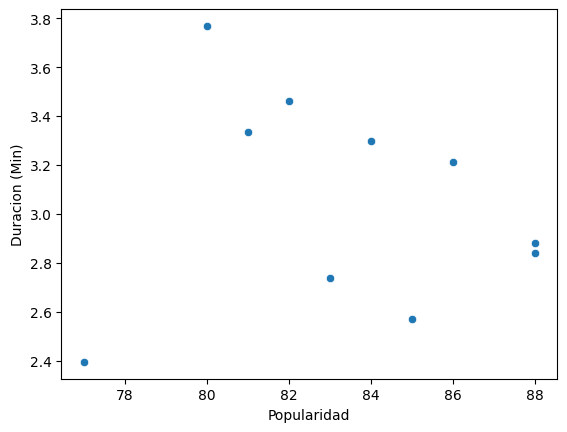

In [5]:
sns.scatterplot(x=df_top10['Popularidad'], y=df_top10['Duracion (Min)'])
plt.show()

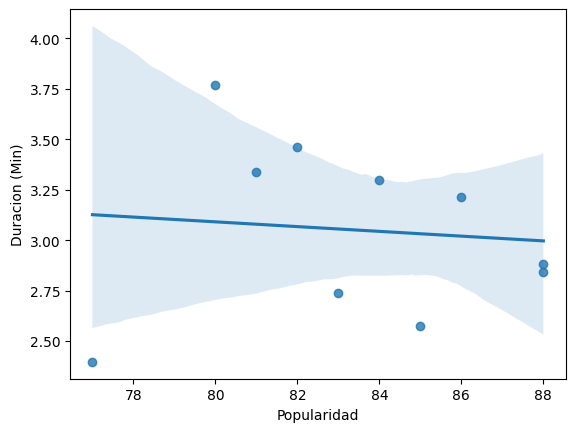

In [6]:

sns.regplot(x=df_top10['Popularidad'], y=df_top10['Duracion (Min)'])
plt.show()
